Challenge

Tu vas reprendre ton notebook de la quête précédente, puis effectuer les étapes ci-dessous.

A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un stemmer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist. Le stemmer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?
A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un lemmatizer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist. Le lemmatizer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?
Attention, pour cette seconde étape, repars du texte nettoyé, mais pas du texte après stemmer. Le but de cet exercice est de comparer les deux méthodes

Compare les deux méthodes : les mots avec les plus grandes valeurs dans le FreqDist sont-ils les mêmes ?
Partage le lien vers ton notebook en guise de solution au challenge.

In [11]:
import nltk
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Télécharger les stopwords si ce n'est pas déjà fait
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/solenedegrutere/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/solenedegrutere/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/solenedegrutere/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/solenedegrutere/nltk_data...


True

In [3]:
text = " Title: From Kitchen to Community: Local Pop-Up Dinners Bring Neighbors Together. In the heart of Portland, something special is simmering — and it’s not just dinner. A local initiative, Plates of the World, is using food to bring communities closer, one pop-up dinner at a time. Launched earlier this year by food enthusiast and community organizer Maya Jensen, the project invites immigrants and locals to cook and share traditional meals together in rotating neighborhood venues. From homemade Ethiopian injera to fragrant Vietnamese pho, each event is a celebration of culture, connection, and cuisine. Food is a universal language, says Maya. You don’t have to speak the same words to enjoy a meal together. The idea began when Maya hosted a small dinner at her apartment, featuring dishes from her Mexican neighbor and her friend’s Syrian aunt. The laughter, stories, and friendships that blossomed around the table inspired her to scale up the idea. Now, every two weeks, Plates of the World pops up in community centers, backyards, and even laundromats, transforming ordinary spaces into hubs of joy. The meals are pay-what-you-can, and all proceeds go toward supporting local refugee families and food access programs. Volunteers help with setup, translation, and even provide live music, turning each evening into a true cultural experience. Attendees come for the food but leave with new friends and perspectives. It’s not just about eating, says one guest, Thomas Nguyen. It’s about learning, laughing, and realizing how much we all have in common. With growing attendance and support from local businesses, Maya hopes to expand the program to other cities. For now, she’s just happy to see people breaking bread and breaking barriers. At a time when the world often feels divided, “Plates of the World” reminds us that unity might just start with a shared meal."

In [4]:
# Convertir le texte en minuscules
text = text.lower()
# Tokeniser le texte (séparer le texte en mots)
words = word_tokenize(text)
# Retirer la ponctuation
words = [word for word in words if word.isalpha()]  # on garde uniquement les mots alphabétiques
# Retirer les stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

print(filtered_words)

['title', 'kitchen', 'community', 'local', 'dinners', 'bring', 'neighbors', 'together', 'heart', 'portland', 'something', 'special', 'simmering', 'dinner', 'local', 'initiative', 'plates', 'world', 'using', 'food', 'bring', 'communities', 'closer', 'one', 'dinner', 'time', 'launched', 'earlier', 'year', 'food', 'enthusiast', 'community', 'organizer', 'maya', 'jensen', 'project', 'invites', 'immigrants', 'locals', 'cook', 'share', 'traditional', 'meals', 'together', 'rotating', 'neighborhood', 'venues', 'homemade', 'ethiopian', 'injera', 'fragrant', 'vietnamese', 'pho', 'event', 'celebration', 'culture', 'connection', 'cuisine', 'food', 'universal', 'language', 'says', 'maya', 'speak', 'words', 'enjoy', 'meal', 'together', 'idea', 'began', 'maya', 'hosted', 'small', 'dinner', 'apartment', 'featuring', 'dishes', 'mexican', 'neighbor', 'friend', 'syrian', 'aunt', 'laughter', 'stories', 'friendships', 'blossomed', 'around', 'table', 'inspired', 'scale', 'idea', 'every', 'two', 'weeks', 'pl

In [9]:
# le stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
freq_stemmed = FreqDist(stemmed_words)

In [12]:
# le lemmatizing
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
freq_lemmatized = FreqDist(lemmatized_words)

Création d'un tableau pour comparer les deux méthodes

Tableau comparatif des fréquences:
        Forme  Fréquence (stemming)  Fréquence (lemmatizing)
5       local                     5                        5
18       food                     5                        5
1      commun                     4                        0
17      world                     4                        4
2        meal                     4                        4
7        maya                     4                        4
4      dinner                     4                        4
0        even                     3                        0
8      togeth                     3                        0
10      plate                     3                        3
3         one                     2                        2
16   neighbor                     2                        2
9       share                     2                        0
11       time                     2                        2
14      bring                     2               

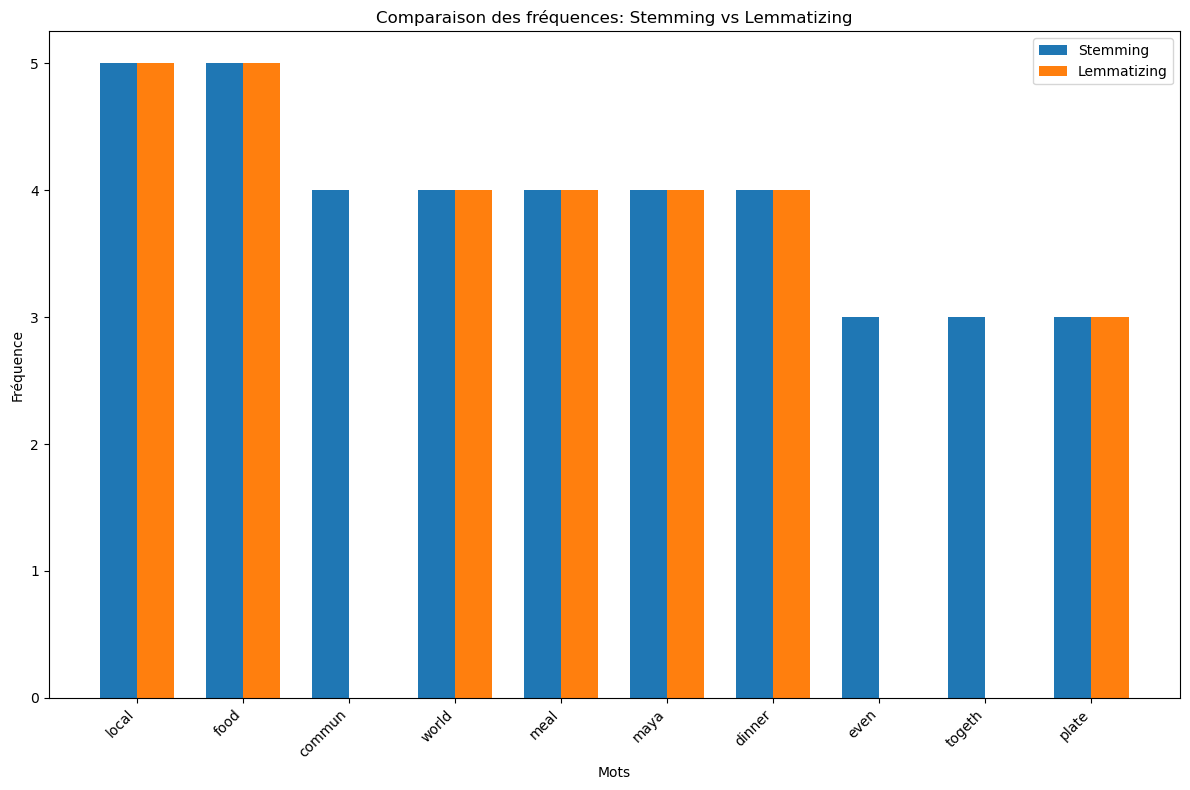

In [17]:
n = 15  # Nombre de mots à afficher
top_stemmed = freq_stemmed.most_common(n)
top_lemmatized = freq_lemmatized.most_common(n)

# Créer des dictionnaires pour faciliter la comparaison
stemmed_dict = dict(top_stemmed)
lemmatized_dict = dict(top_lemmatized)

# Compiler tous les mots uniques des deux listes pour comparer
all_stems = set([stem for stem, _ in top_stemmed])
all_lemmas = set([lemma for lemma, _ in top_lemmatized])
all_unique_forms = all_stems.union(all_lemmas)

# Créer les données pour le tableau de comparaison
compare_data = []

for word in all_unique_forms:
    # Obtenir les fréquences (0 si le mot n'est pas dans le top N)
    stem_freq = stemmed_dict.get(word, 0)
    lemma_freq = lemmatized_dict.get(word, 0)
    
    compare_data.append({
        'Forme': word,
        'Fréquence (stemming)': stem_freq,
        'Fréquence (lemmatizing)': lemma_freq
    })

# Convertir en DataFrame pour un affichage amélioré
df_compare = pd.DataFrame(compare_data)

# Trier par fréquence du stemming (décroissant)
df_compare = df_compare.sort_values(by='Fréquence (stemming)', ascending=False)

# Afficher le tableau comparatif
print("Tableau comparatif des fréquences:")
print(df_compare)

# Si vous préférez exporter vers un CSV
# df_compare.to_csv('comparaison_stemming_lemmatizing.csv', index=False)

# Option visuelle avec matplotlib
import matplotlib.pyplot as plt

# Sélectionner les 10 premiers mots pour la visualisation
df_plot = df_compare.head(10)

# Créer la figure
plt.figure(figsize=(12, 8))
x = range(len(df_plot))
width = 0.35

plt.bar([i - width/2 for i in x], df_plot['Fréquence (stemming)'], width, label='Stemming')
plt.bar([i + width/2 for i in x], df_plot['Fréquence (lemmatizing)'], width, label='Lemmatizing')

plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Comparaison des fréquences: Stemming vs Lemmatizing')
plt.xticks(x, df_plot['Forme'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()